<a href="https://colab.research.google.com/github/manojvenaram/TSA_EXP7/blob/main/time_seriesexp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADF Statistic: -1.3354865665409237
p-value: 0.6127849061366556


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


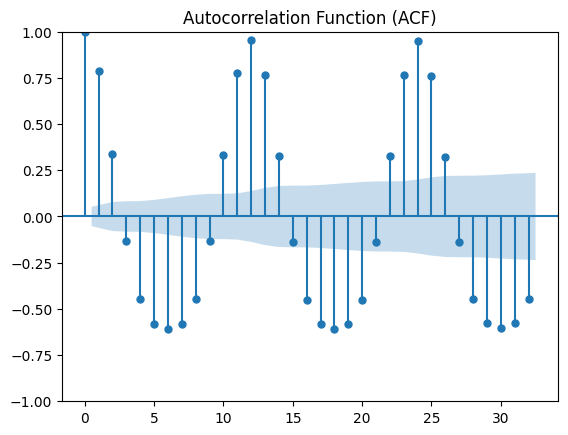

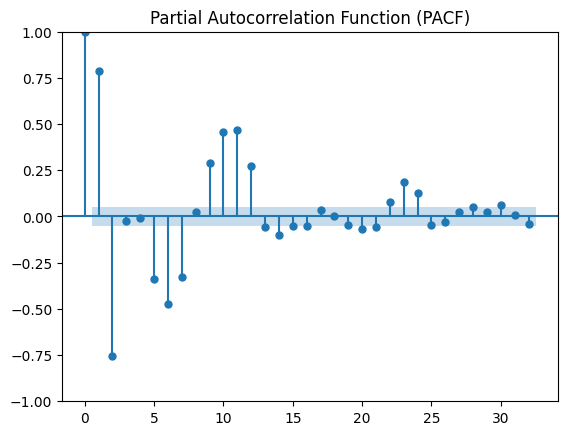

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Mean Squared Error (MSE): 1.7379802760903547


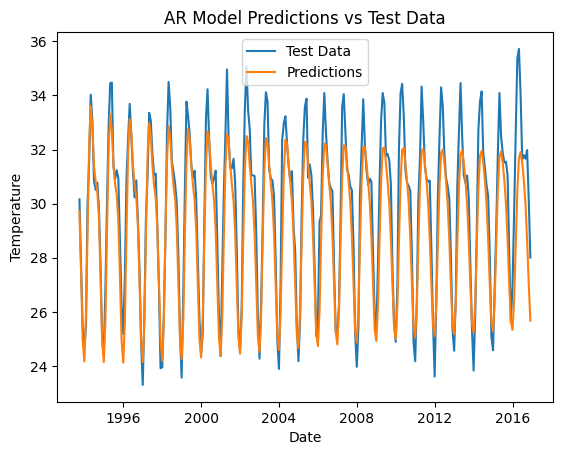

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/Temperature.csv")  # Replace "your_dataset.csv" with the actual path to your CSV file
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Perform Augmented Dickey-Fuller test
result = adfuller(data['temp'])  # Assuming 'Temperature' is the column name containing temperature data
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Split the data into training and testing sets
train_data = data.iloc[:int(0.8*len(data))]
test_data = data.iloc[int(0.8*len(data)):]

# Fit an AutoRegressive (AR) model with 13 lags
lag_order = 13
model = AutoReg(train_data['temp'], lags=lag_order)
model_fit = model.fit()

# Plot Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF)
plot_acf(data['temp'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data['temp'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Make predictions using the AR model
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Compare the predictions with the test data
mse = mean_squared_error(test_data['temp'], predictions)
print('Mean Squared Error (MSE):', mse)

# Plot the test data and predictions
plt.plot(test_data.index, test_data['temp'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('AR Model Predictions vs Test Data')
plt.legend()
plt.show()
